## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1)
Y = data['target'].values

## 1. Finding the Correlation between the features

### a. correlation between the features

In [5]:
X.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000


### b. plot heat map of correlation matrix using seaborn heatmap

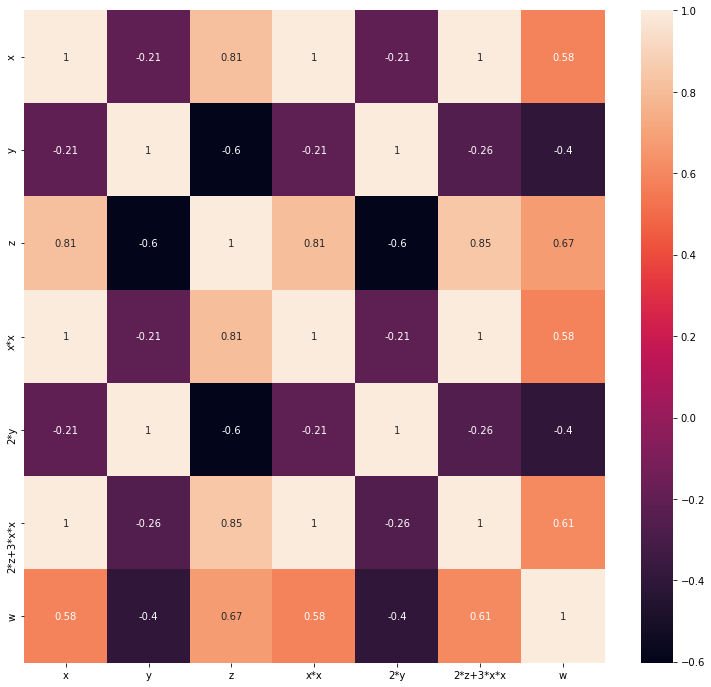

In [6]:
plt.figure(figsize=(13,12))
sns.heatmap(X.corr(), annot =True)
plt.show()

***Observation**

1. From the heatmap we can able to see that 2*y and y are highly correlated their value is 1
2. x*y and 2*z+3*x*x is also highly correlated with each other their value also 1
3. Remaining highly correlated features are x and x**x , x and 2*z+3*x*x , x*x and 2*z+3*x*x

# Task: 1 Logistic Regression

## 2. Finding the best model for the given data

### a. Train Logistic regression on data(X,Y) that we have created in the above cell

In [7]:
alpha =  np.logspace(-5, 8, 10)
print(alpha)
parameters = {'C':alpha}

[1.00000000e-05 2.78255940e-04 7.74263683e-03 2.15443469e-01
 5.99484250e+00 1.66810054e+02 4.64158883e+03 1.29154967e+05
 3.59381366e+06 1.00000000e+08]


###  b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation using grid search cv

In [8]:
clf = LogisticRegression()

In [9]:
logreg = GridSearchCV(clf, parameters, cv=5)

In [10]:
logreg.fit(X,Y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 2.78255940e-04, 7.74263683e-03, 2.15443469e-01,
       5.99484250e+00, 1.66810054e+02, 4.64158883e+03, 1.29154967e+05,
       3.59381366e+06, 1.00000000e+08])})

In [11]:
logreg.best_params_

{'C': 1e-05}

### c. Creat a new Logistic regression with the best alpha

In [12]:
best_model = LogisticRegression(C=1e-05 )

In [13]:
best_model.fit(X,Y)

LogisticRegression(C=1e-05)

In [14]:
y_pred = best_model.predict(X)

## 3. Getting the weights with the original data

### b. Check the accuracy of the model 'best_model_accuracy'

In [15]:
accuracy =accuracy_score(Y, y_pred)
print(accuracy)

1.0


### c. Get the weights W using best_model.coef_

In [16]:
weights = abs(best_model.coef_[0])
print(weights)

[0.00036369 0.000345   0.00048449 0.00035933 0.000345   0.00038189
 0.00032048]


## 4. Modifying original data

### a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)

In [17]:
# (order of 10^-2) = 0.01 https://en.wikipedia.org/wiki/Order_of_magnitude

X_new = X+0.01

### b. Train the same 'best_model' with data (X', Y)

In [18]:
new_model=best_model.fit(X_new,Y)

In [19]:
y_pred_new = best_model.predict(X_new)

### c. Check the accuracy of the model 'best_model_accuracy_edited'

In [20]:
new_accuracy =accuracy_score(Y, y_pred_new)
print(new_accuracy)

1.0


### d. Get the weights W' using best_model.coef_

In [21]:
new_weights = abs(new_model.coef_[0])
print(new_weights)

[0.00036369 0.000345   0.00048449 0.00035933 0.000345   0.00038189
 0.00032048]


## 5.  Checking deviations in metric and weights

## a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'

In [22]:
new_accuracy - accuracy

0.0

### b. find the absolute change between each value of W and W' ==> |(W-W')|

In [23]:
new_weights - weights

array([-3.04544421e-11,  3.04711950e-11, -3.04588067e-11, -3.04540615e-11,
        3.04711950e-11, -3.04543616e-11, -3.04569678e-11])

### C. printing the top 4 features which have higher % change in weights compare to the other feature

In [24]:
difference=abs((weights-new_weights))
print(difference)

[3.04544421e-11 3.04711950e-11 3.04588067e-11 3.04540615e-11
 3.04711950e-11 3.04543616e-11 3.04569678e-11]


In [25]:
percentage_change = (difference/weights) * 100
percentage_change

array([8.37376500e-06, 8.83217937e-06, 6.28679420e-06, 8.47526857e-06,
       8.83217937e-06, 7.97459198e-06, 9.50352764e-06])

In [26]:
top_features = pd.DataFrame({'columns':X.columns , 'percentage_change':percentage_change})
top_features

,columns,percentage_change
0,x,0.000008
1,y,0.000009
2,z,0.000006
3,x*x,0.000008
4,2*y,0.000009
5,2*z+3*x*x,0.000008
6,w,0.000010


### The top 4 features which have higher % change in weights

In [27]:
top_features.sort_values('percentage_change',ascending=False)[:4]

,columns,percentage_change
6,w,0.000010
1,y,0.000009
4,2*y,0.000009
3,x*x,0.000008


# Task: 2 Linear SVM

### a. Train Logistic regression on data(X,Y) that we have created in the above cell

In [28]:
alpha =  np.logspace(-5, 8, 10)
print(alpha)
parameters = {'C':alpha}

[1.00000000e-05 2.78255940e-04 7.74263683e-03 2.15443469e-01
 5.99484250e+00 1.66810054e+02 4.64158883e+03 1.29154967e+05
 3.59381366e+06 1.00000000e+08]


###  b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation using grid search cv

In [29]:
clf = SVC(kernel="linear")

In [30]:
svc = GridSearchCV(clf, parameters, cv=5)

In [31]:
svc.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-05, 2.78255940e-04, 7.74263683e-03, 2.15443469e-01,
       5.99484250e+00, 1.66810054e+02, 4.64158883e+03, 1.29154967e+05,
       3.59381366e+06, 1.00000000e+08])})

In [32]:
svc.best_params_

{'C': 0.007742636826811269}

### c. Creat a new Logistic regression with the best alpha¶

In [33]:
best_model = SVC(kernel="linear",C=0.007742636826811269 )

In [34]:
best_model.fit(X,Y)

SVC(C=0.007742636826811269, kernel='linear')

In [35]:
y_pred = best_model.predict(X)

## 3. Getting the weights with the original data

### b. Check the accuracy of the model 'best_model_accuracy'

In [36]:
accuracy =accuracy_score(Y, y_pred)
print(accuracy)

1.0


### c. Get the weights W using best_model.coef_

In [37]:
weights = abs(best_model.coef_[0])
print(weights)

[0.16056222 0.20788705 0.32826166 0.14998082 0.20788705 0.17461587
 0.13401176]


## 4. Modifying original data¶

### a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)¶

In [38]:
X_new = X+0.01

## b. Train the same 'best_model' with data (X', Y)¶

In [39]:
new_model=best_model.fit(X_new,Y)

In [40]:
y_pred_new = best_model.predict(X_new)

### c. Check the accuracy of the model 'best_model_accuracy_edited'

In [41]:
new_accuracy =accuracy_score(Y, y_pred_new)
print(new_accuracy)

1.0


### d. Get the weights W' using best_model.coef_

In [42]:
new_weights = abs(new_model.coef_[0])
print(new_weights)

[0.16049457 0.20810298 0.32832289 0.14997999 0.20810298 0.17462251
 0.13395324]


## 5. Checking deviations in metric and weights

### a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'

In [43]:
new_accuracy - accuracy

0.0

### b. find the absolute change between each value of W and W' ==> |(W-W')|

In [44]:
new_weights - weights

array([-6.76507103e-05,  2.15922620e-04,  6.12315122e-05, -8.28999945e-07,
        2.15922620e-04,  6.64650572e-06, -5.85197413e-05])

### C. printing the top 4 features which have higher % change in weights compare to the other feature difference=abs((weights-new_weights))

In [45]:
difference=abs((weights-new_weights))
print(difference)

[6.76507103e-05 2.15922620e-04 6.12315122e-05 8.28999945e-07
 2.15922620e-04 6.64650572e-06 5.85197413e-05]


In [46]:
percentage_change = (difference/weights) * 100
percentage_change

array([0.04213364, 0.10386535, 0.01865326, 0.00055274, 0.10386535,
       0.00380636, 0.04366762])

In [47]:
top_features = pd.DataFrame({'columns':X.columns , 'percentage_change':percentage_change})
top_features

,columns,percentage_change
0,x,0.042134
1,y,0.103865
2,z,0.018653
3,x*x,0.000553
4,2*y,0.103865
5,2*z+3*x*x,0.003806
6,w,0.043668


### The top 4 features which have higher % change in weights

In [48]:
top_features.sort_values('percentage_change',ascending=False)[:4]

,columns,percentage_change
1,y,0.103865
4,2*y,0.103865
6,w,0.043668
0,x,0.042134


***Observations**

1. Features which are highly correlated with other features are having higher percentage change when we add a noisy points
2. For both Logistic regression and SVC the top_ features are almost similar